Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
Diwali_data = pd.read_csv('/content/DiwaliSales.csv', encoding='unicode_escape')

In [ ]:
Diwali_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Siya,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Piyusha,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudesh,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
Diwali_data.shape

(11255, 15)

In [ ]:
Diwali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11255 entries, 0 to 11254
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11255 non-null  int64  
 1   Cust_name         11255 non-null  object 
 2   Product_ID        11255 non-null  object 
 3   Gender            11255 non-null  object 
 4   Age Group         11255 non-null  object 
 5   Age               11255 non-null  int64  
 6   Marital_Status    11255 non-null  int64  
 7   State             11255 non-null  object 
 8   Zone              11255 non-null  object 
 9   Occupation        11255 non-null  object 
 10  Product_Category  11255 non-null  object 
 11  Orders            11255 non-null  int64  
 12  Amount            11243 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#drop unrelated/blank columns
Diwali_data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [ ]:
#check for null values
Diwali_data.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
# drop null values
Diwali_data.dropna(inplace=True)

In [ ]:
# change data type
Diwali_data['Amount'] = Diwali_data['Amount'].fillna(0).astype('int')

In [ ]:
Diwali_data['Amount'].dtypes
Diwali_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')




Exploratory Data Analysis

Age

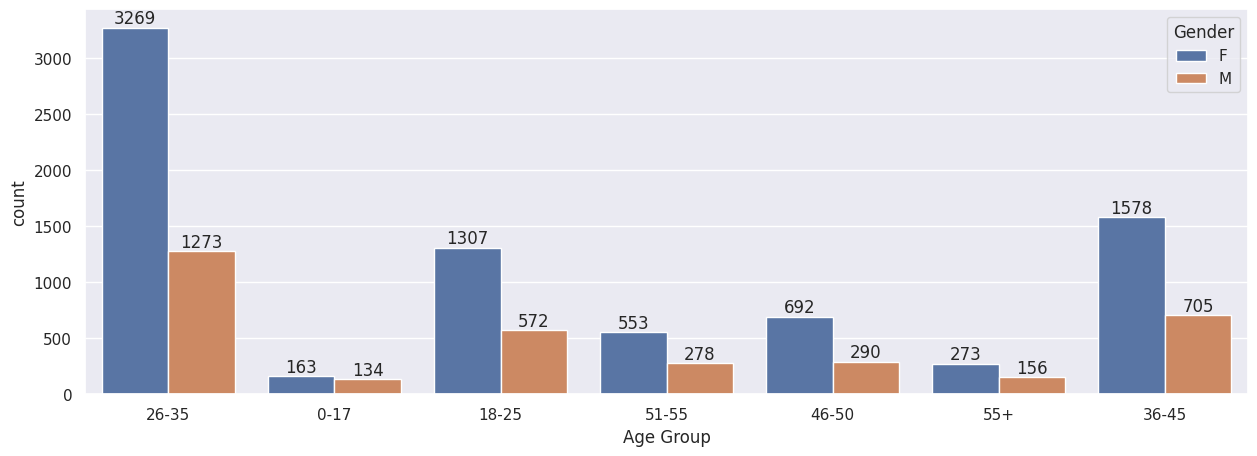

In [ ]:
ax = sns.countplot(data = Diwali_data, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

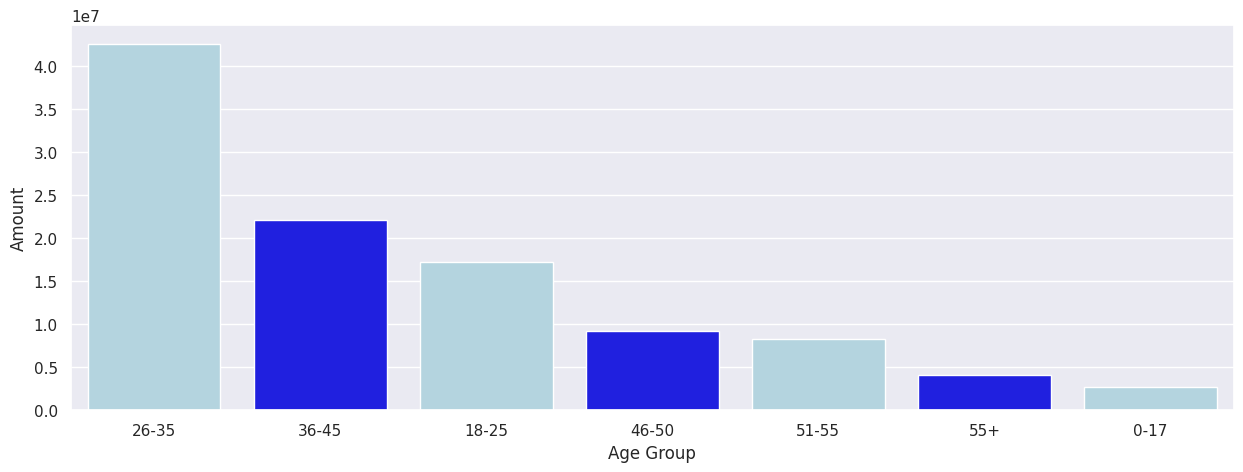

In [ ]:
# Total Amount vs Age Group
palette = ['lightblue', 'blue']
sales_age = Diwali_data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette=palette)

Gender

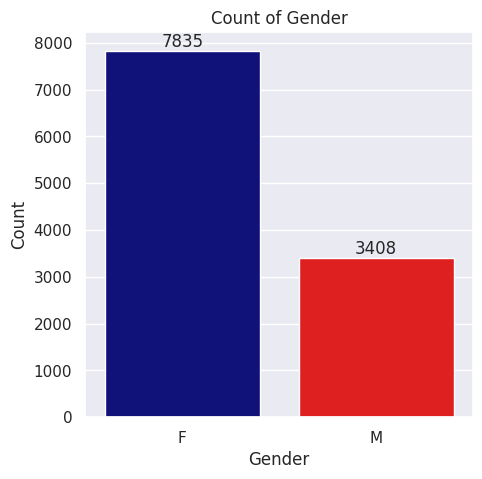

In [ ]:
# plotting a bar chart for Gender and it's count
palette = ['darkblue', 'red']
plt.figure(figsize=(5,5))
ax = sns.countplot(x = 'Gender',data = Diwali_data,palette=palette)

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Gender', ylabel='Amount'>

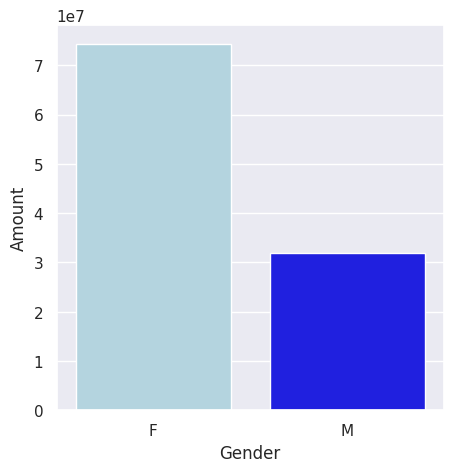

In [ ]:
#Gender Vs Total amount
palette = ['lightblue', 'blue']
sales_gen = Diwali_data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(5,5))

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette=palette)

State

<Axes: xlabel='State', ylabel='Orders'>

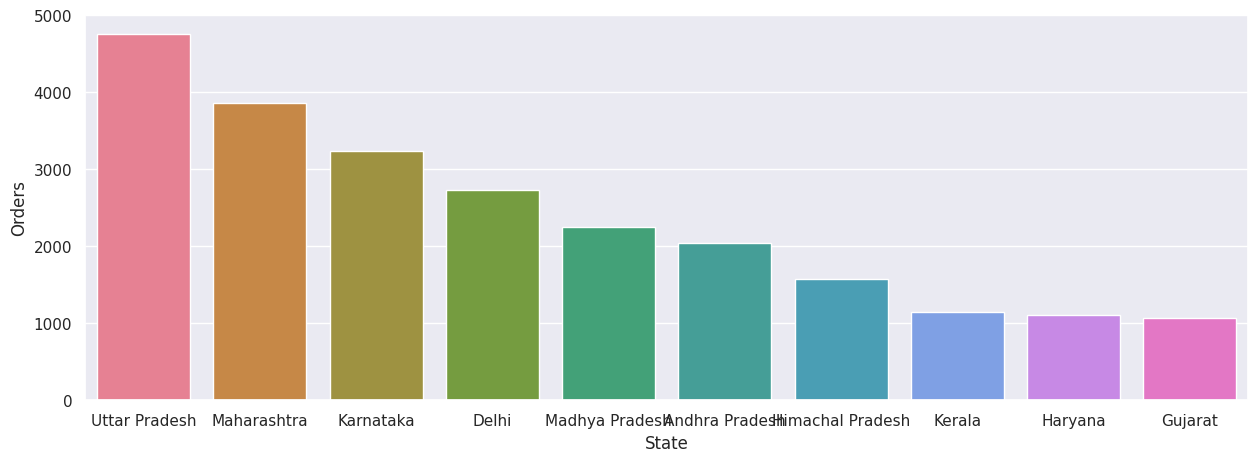

In [ ]:
# total number of orders from top 10 states
palette = sns.color_palette("husl", len(sales_state))
sales_state = Diwali_data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette=palette)

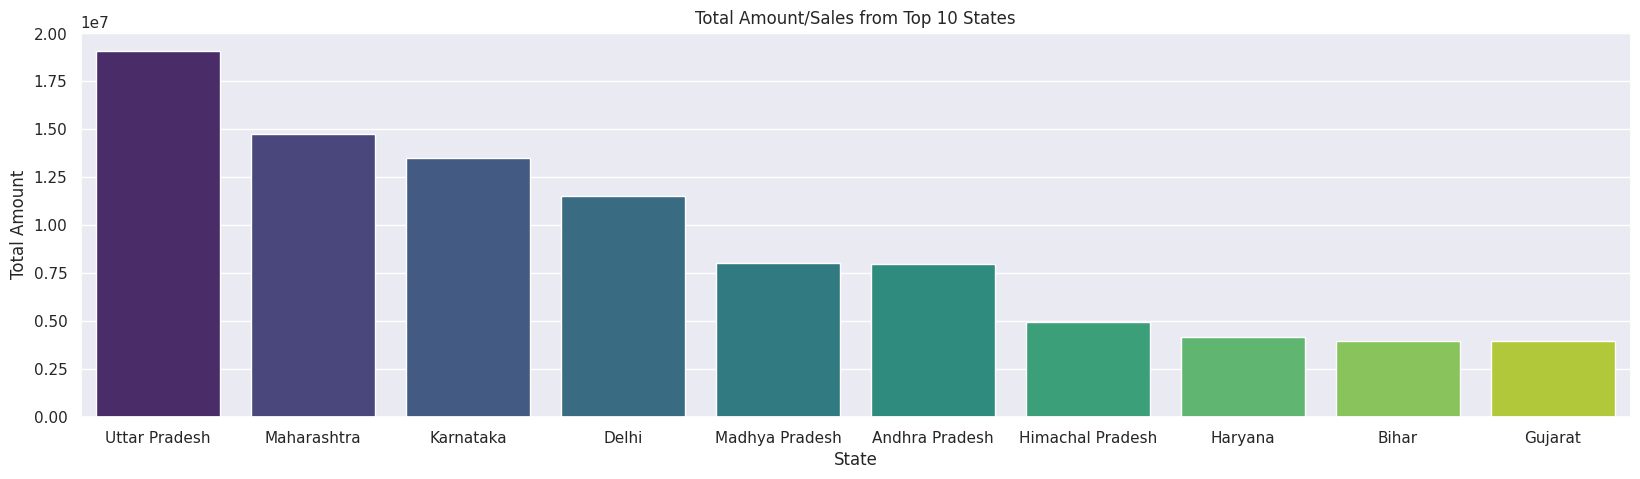

In [ ]:
# Calculate total sales from top 10 states
top_sales = Diwali_data.groupby('State')['Amount'].sum().nlargest(10).reset_index()

# Plotting
sns.barplot(data=top_sales, x='State', y='Amount', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Adding title and labels
plt.title('Total Amount/Sales from Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Amount')

plt.show()

Occuption

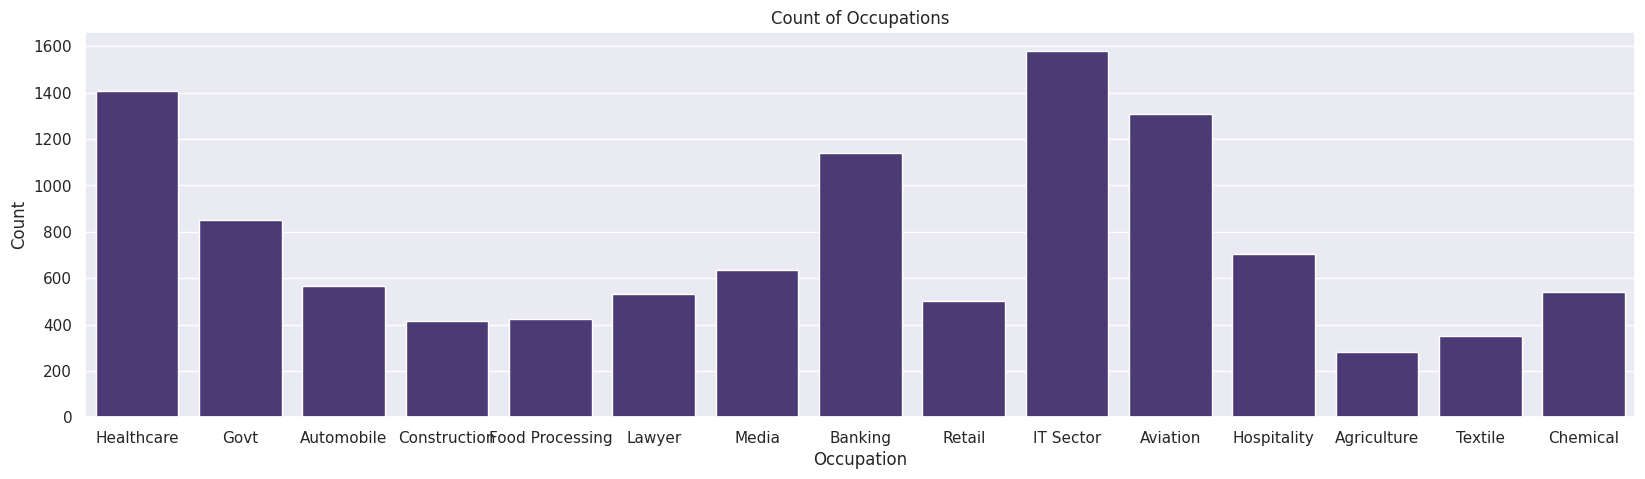

In [ ]:
sns.set(rc={'figure.figsize': (20, 5)},palette='viridis')

# Create a count plot
ax = sns.countplot(data=Diwali_data, x='Occupation')

# Add title and labels
ax.set_title('Count of Occupations')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')

# Show the plot
plt.show()


<Axes: xlabel='Occupation', ylabel='Amount'>

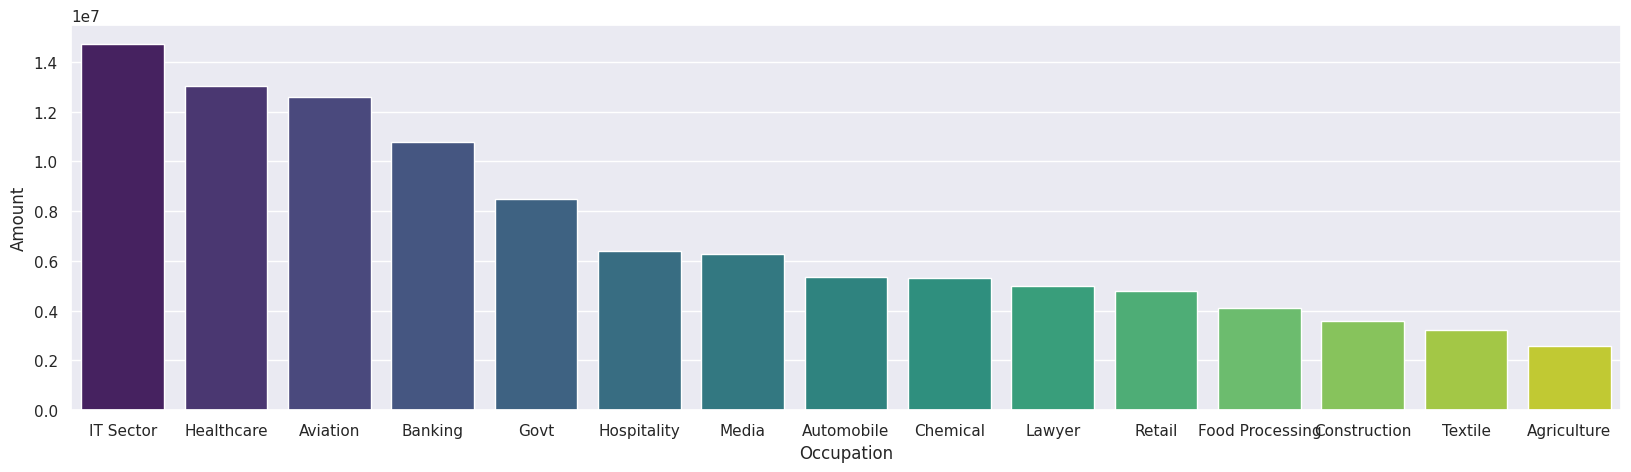

In [ ]:
sales_state = Diwali_data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette='viridis')

Product Category

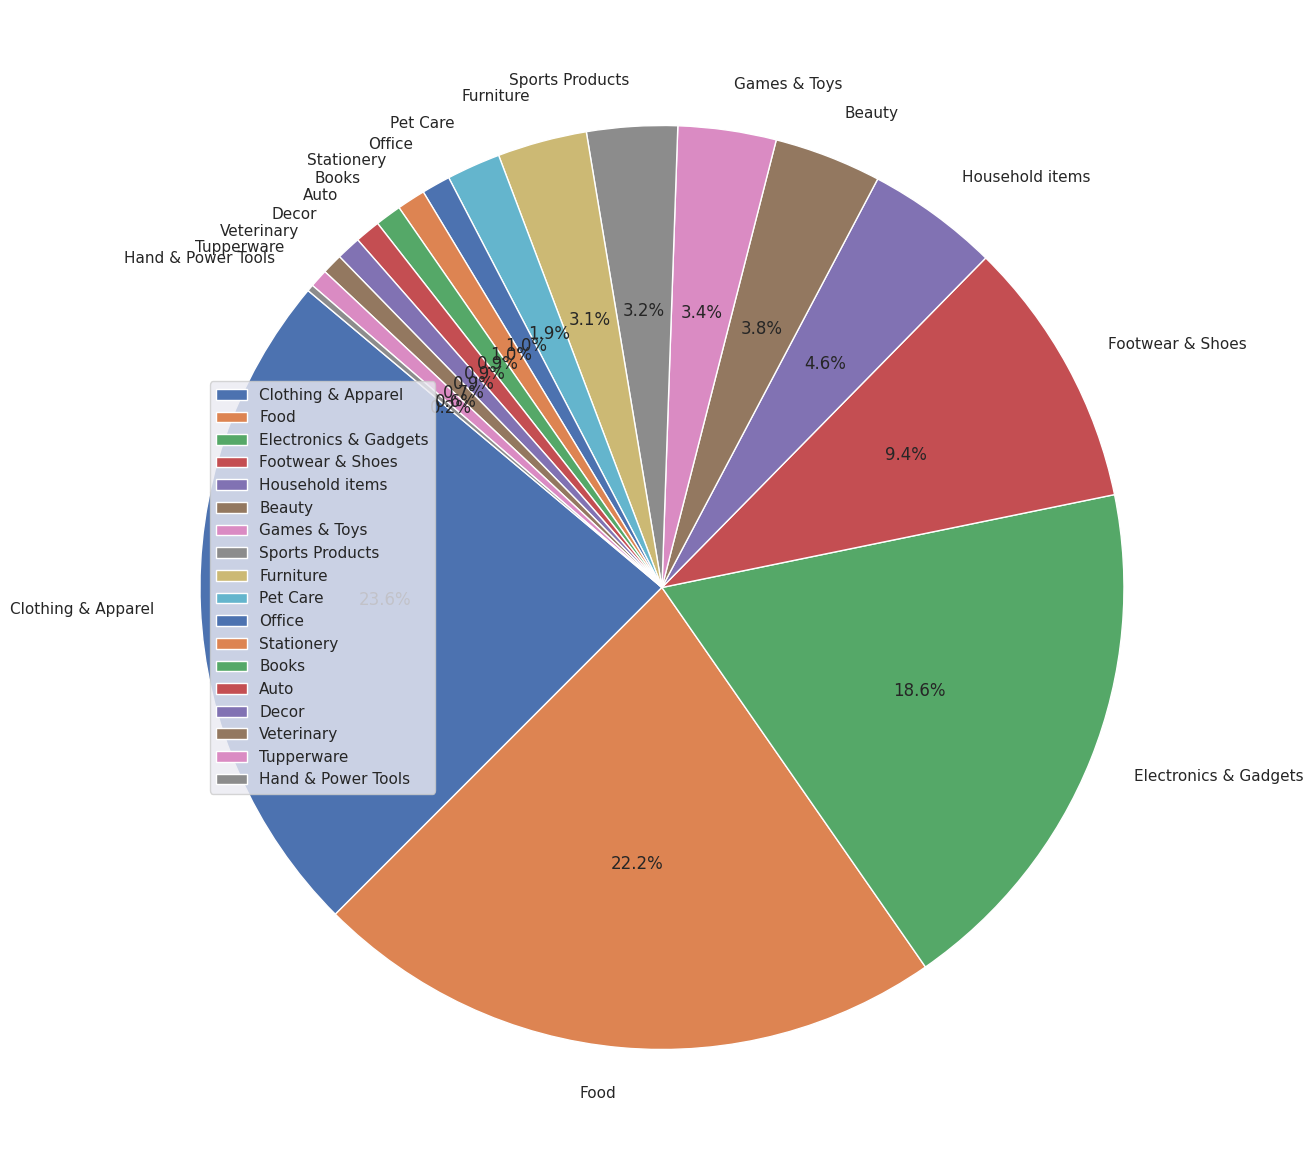

In [ ]:
category_counts = Diwali_data['Product_Category'].value_counts()

plt.figure(figsize=(15,15))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data =Diwali_data, x = 'Product_Category')


for bars in ax.containers:
    ax.bar_label(bars)

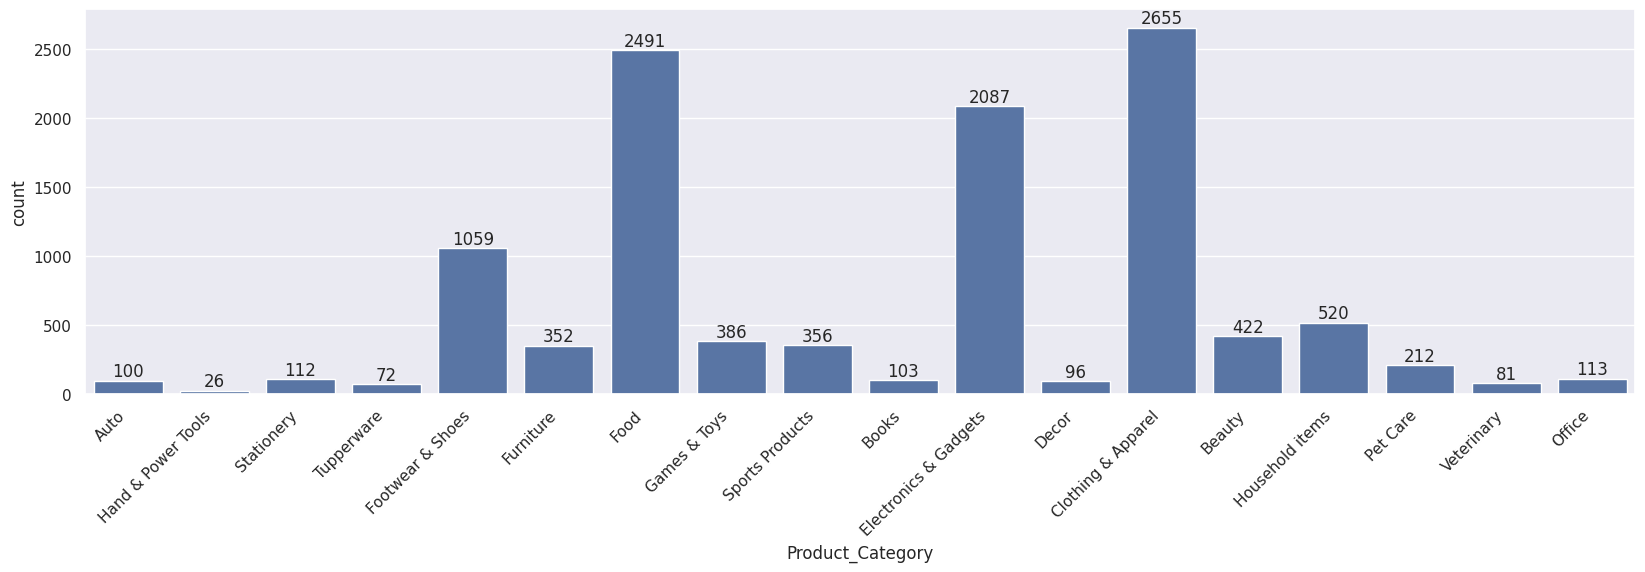

In [ ]:

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data =Diwali_data, x = 'Product_Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Product_ID', ylabel='Orders'>

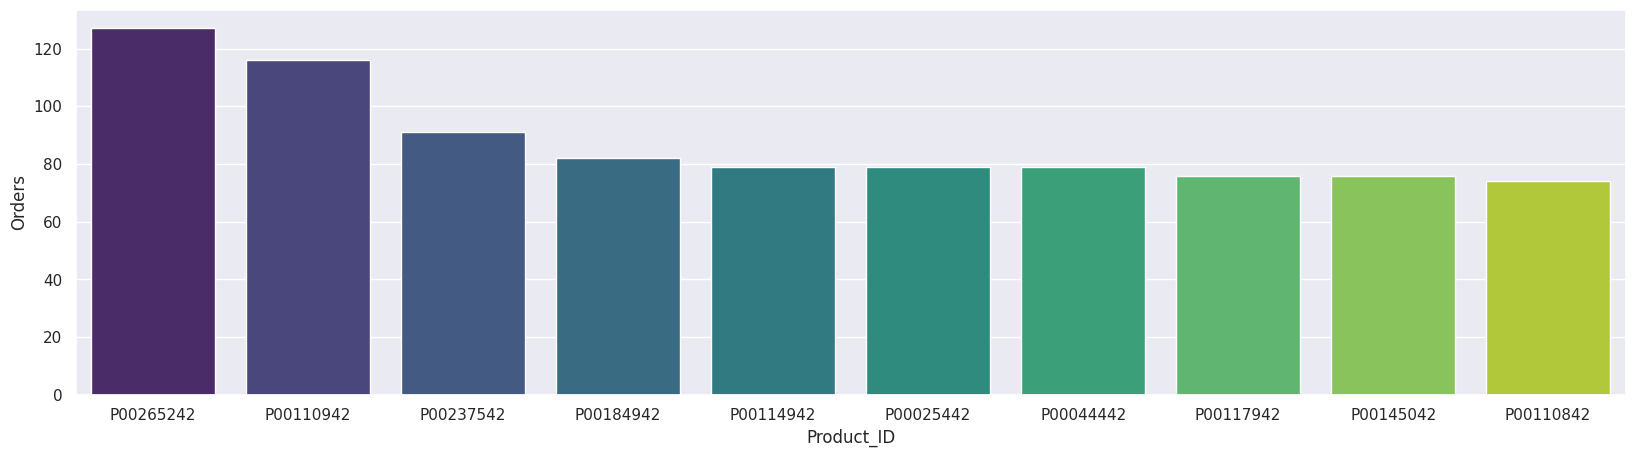

In [ ]:
#most sold productid
sales_state = Diwali_data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette='viridis')

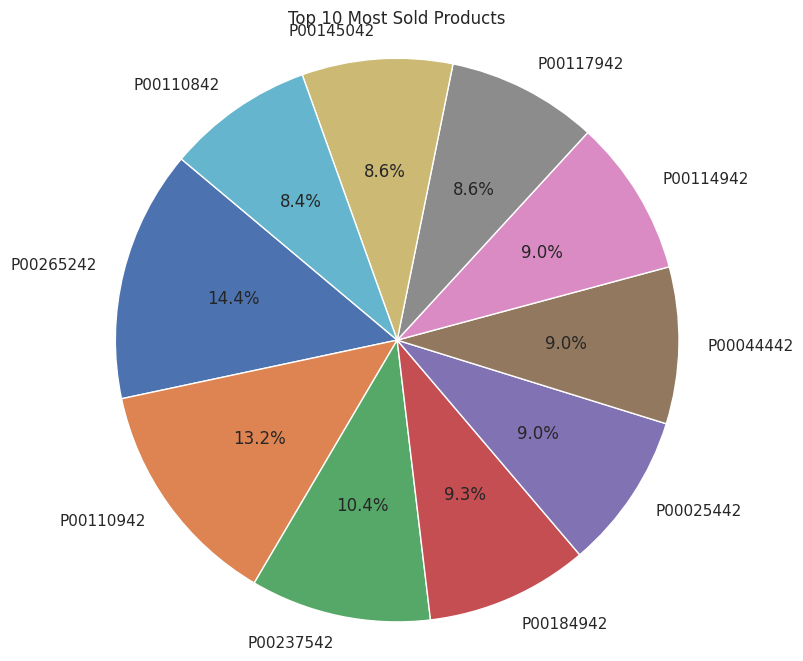

In [ ]:
top_products = Diwali_data.groupby('Product_ID')['Orders'].sum().nlargest(10)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Sold Products')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()